El presente script raliza un análisis sobre datos del electrocardiogramas a partir del tratamientos de señales. 

Primero, se analizaron cuatro señales ECG, dos sintéticas (senal_ECG_1 y senal_ECG_2) y dos reales (senal_real_ECG_1 y senal_real_ECG_2). Se graficaron estas señales junto con sus respectivas transformadas de Fourier para obtener una mejor comprensión tanto en el dominio del tiempo como en el de la frecuencia.

Luego, se identificaron las frecuencias cardíacas de cada paciente a partir de las gráficas de las señales y sus transformadas de Fourier. Se tuvo cuidado de distinguir la frecuencia fundamental de las señales, evitando confusiones con el ruido.

Después, se procedió a graficar las señales ECG reales y sus espectros de Fourier. Se notó que la transformada de Fourier de senal_real_ECG_2 aparentaba ser nula, pero en realidad tenía un valor promedio demasiado alto, lo que impedía visualizar adecuadamente la señal. Se corrigió este sesgo restando el valor promedio de la señal original a todos los datos antes de realizar nuevamente la transformada de Fourier.

Con base en estos análisis, se identificaron las frecuencias cardíacas y se determinó si las señales ECG correspondían a pacientes sanos o no.

Finalmente, se identificó la frecuencia cardíaca en las señales reales y se evaluó si alguna de ellas había sido sometida previamente a un tratamiento digital. Se proporcionó una justificación basada en los resultados obtenidos.

# Electrocardiograma.

In [ ]:
# Código de Google Colaboratory para subir el archivo WAV y trabajar con él
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Colab Notebooks/senal_ECG_1.txt' 'senal_ECG_1.txt'
!cp '/content/gdrive/My Drive/Colab Notebooks/senal_ECG_2.txt' 'senal_ECG_2.txt'
!cp '/content/gdrive/My Drive/Colab Notebooks/senal_real_ECG_1.txt' 'senal_real_ECG_1.txt'
!cp '/content/gdrive/My Drive/Colab Notebooks/senal_real_ECG_2.txt' 'senal_real_ECG_2.txt'
#####

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile
import IPython.display as ipd

plt.rcParams['figure.figsize'] = 20, 10 # para modificar el tamaño de la figura

font = {'weight' : 'bold',
        'size'   : 24}

plt.rc('font', **font)
%matplotlib inline

# Ahora vamos a convertir los datos txt en vectores( o arreglos) para poder manipularlos más fácilmente.
senal_1 = np.loadtxt('senal_ECG_1.txt')
senal_2 = np.loadtxt('senal_ECG_2.txt')
senalr_1=np.loadtxt('senal_real_ECG_1.txt')
senalr_2=np.loadtxt('senal_real_ECG_2.txt')

print("senal_ECG_1.txt", senal_1)
print("senal_ECG_2.txt", senal_2)
print("senal_real_ECG_1.txt", senalr_1)
print("senal_real_ECG_2.txt", senalr_2)

c= np.shape(senal_1)
print(c)

senal_ECG_1.txt [0.52417 0.52342 0.52258 ... 2.5878  2.6007  2.6136 ]
senal_ECG_2.txt [0.017571 0.017617 0.017664 ... 0.017431 0.017477 0.017524]
senal_real_ECG_1.txt [ 8.8710e-03  5.6274e+01  8.5708e+01 ... -1.2095e+02 -1.3173e+02
 -1.3290e+02]
senal_real_ECG_2.txt [3904.3 3939.2 3976.  ... 4366.4 4365.3 4370.9]
(106000,)


Se grafican las señales sintéticas y sus respectivas transformadas de Fourier, teniendo en cuenta que las señales ECG se simularon para un tiempo total de 10 segundos.

A continuación se desarrolla la graficación de las señales y su respectiva transformada de Fourier, lo que se debe tener en cuenta y es de vital importancia es que el $dt$ que se utiliza para hacer la transformada y también utilizado para los arreglos se calcula de la forma $$dt = \frac{Tiempototal}{Cantidad_{dedatos}}$$

<Figure size 1440x720 with 0 Axes>

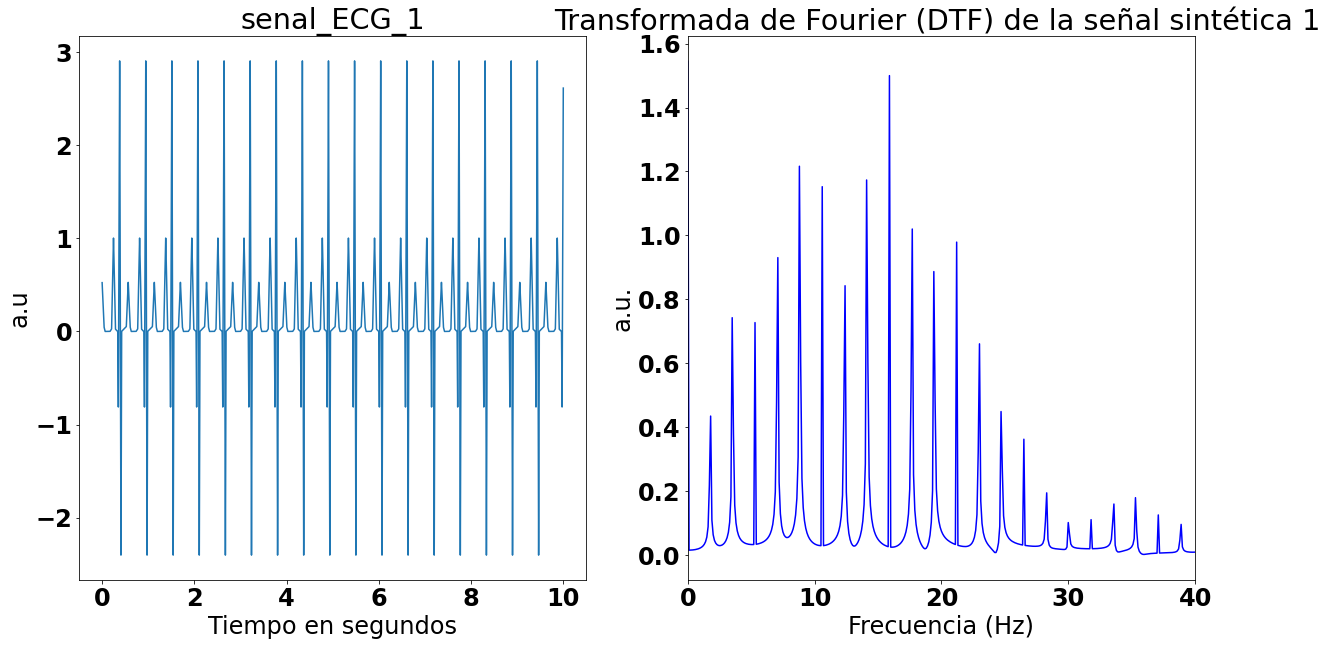

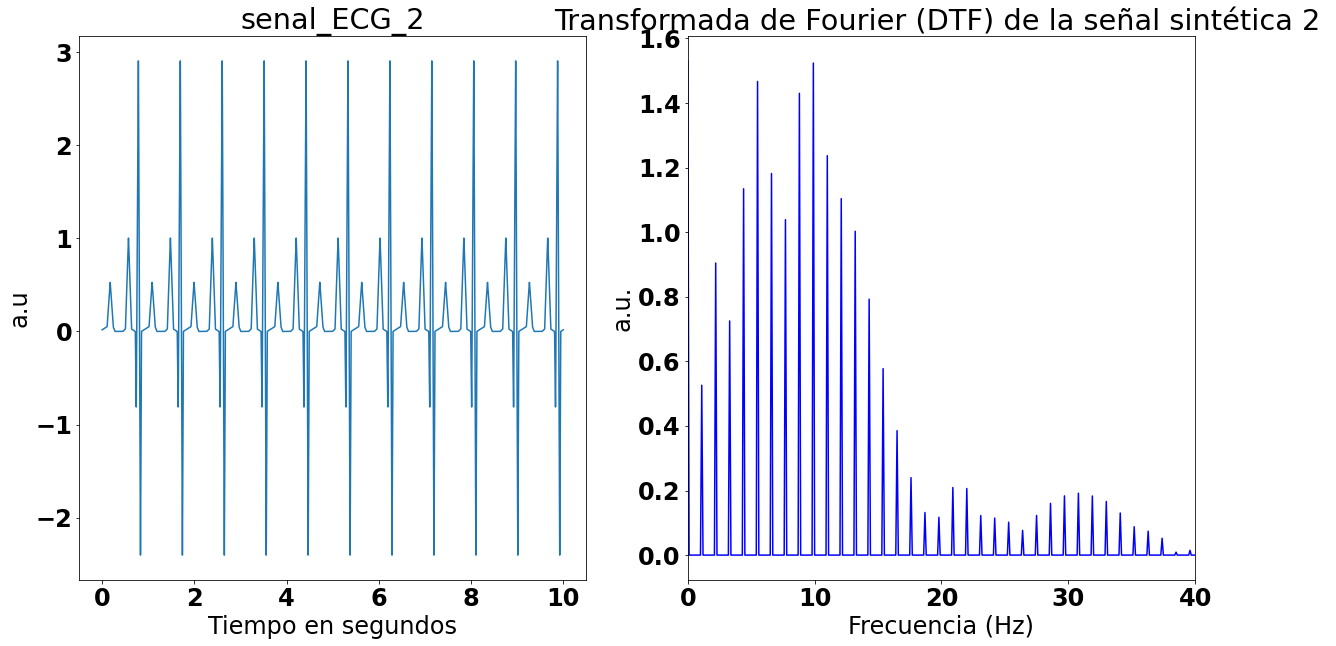

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = 20, 10 # para modificar el tamaño de la figura

font = {'weight' : 'bold',
        'size'   : 24}

plt.rc('font', **font)



#Señal sintética 1
a1=senal_1.size #Cantidad de datos de la señal 1.
dt1 = 10  / a1  #Se halla el dt para la señal sintética 1
tiempo_senal_1= np.arange(0,10,dt1) #Arreglo temporal dado para la señal 1
plt.subplot(1,2,1)
plt.plot(tiempo_senal_1, senal_1)
plt.xlabel("Tiempo en segundos")
plt.ylabel("a.u")
plt.title("senal_ECG_1")



# Transformada de Fourier para la señal 1
DTF1=np.fft.fftshift(np.fft.fft(np.fft.fftshift(senal_1)))*dt1
#freq1 =60*np.linspace(-1/(2*dt1),1/(2*dt1),a) ----> Esto se hace en la próxima celda para pasar de Hz a bpm
fr1 = np.arange(-1/(2*dt1),1/(2*dt1),1/(dt1*a1)) #Arreglo de la frecuencia en Hz

# Gráfica de la senal_1 sintética con su respectiva transformada de Fourier.
plt.subplot(1,2,2)
plt.plot(fr1,abs(DTF1),color='blue')
plt.title('Transformada de Fourier (DTF) de la señal sintética 1 ')
plt.ylabel('a.u.')  #Unidades arbitrarias.
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,40)   # Para mirar un intervalo en el rango de las frecuencias.
plt.figure()


#Señal sintética 2
a2= senal_2.size   #Cantidad de datos del arreglo de la señal sintética 2
dt2 = 10/ a2   #dt para la señal sintética 2, recordar la forma de hallar este dt en la parte superior.
tiempo_senal_2 = np.arange(0,10,dt2)   #Arreglo temporal dado para la señal 2
plt.subplot(1,2,1)
plt.plot(tiempo_senal_2, senal_2)
plt.xlabel("Tiempo en segundos")
plt.ylabel("a.u")
plt.title("senal_ECG_2")


#Transformada de Fourier para la señal sintética 2
DTF2=np.fft.fftshift(np.fft.fft(np.fft.fftshift(senal_2)))*dt2
#freq2 =60*np.linspace(-1/(2*dt2),1/(2*dt2),a2)  ---> conversión de Hz a bpm
fr2 = np.arange(-1/(2*dt2),1/(2*dt2),1/(dt2*a2))  #Arreglo de frecuencias para la señal sintética 2

# Gráfica de la senal_2 sintética con su respectiva transformada de Fourier.
plt.subplot(1,2,2)
plt.plot(fr2,abs(DTF2),color='blue')
plt.title('Transformada de Fourier (DTF) de la señal sintética 2 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,40)   # Para mirar un intervalo en el rango de las frecuencias.

plt.figure()




Ahora, se identifican las frecuencias cardíacas de cada paciente a partir de las gráficas de las señales y sus transformadas de Fourier.

Primero se grafica la frecuencia del paciente en unidades bpm

No handles with labels found to put in legend.


<Figure size 1440x720 with 0 Axes>

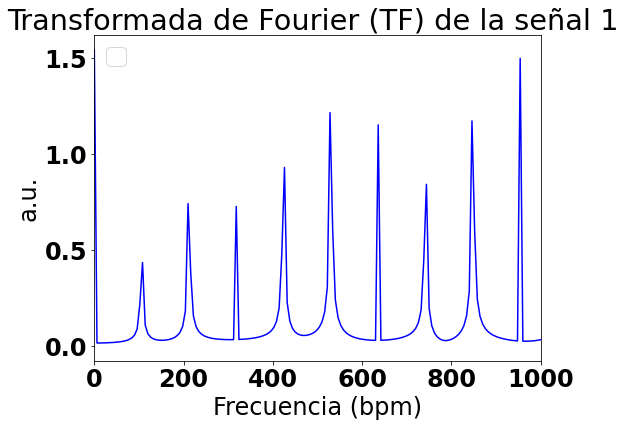

<Figure size 1440x720 with 0 Axes>

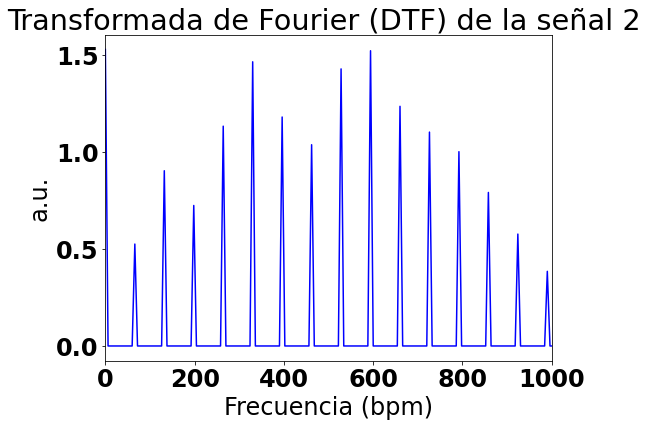

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Simplemente es hacer lo mismo pero los arreglos fr1 y fr2 los multiplicamos por 60.


# Para la señal 1
plt.figure(figsize=(8,6))
plt.plot(fr1*60,abs(DTF1),color='blue')
plt.title('Transformada de Fourier (TF) de la señal 1 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (bpm)')
#plt.vlines(108,0,1.6, label="Frecuencia del paciente") # ----> si se activa nos muestra una recta donde se encuentra la frecuencia del paciente
plt.xlim(0,1000)   # Para mirar un intervalo en el rango de las frecuencias.
plt.legend()
plt.figure()


#Para la señal 2

plt.figure(figsize=(8,6))
plt.plot(fr2*60,abs(DTF2),color='blue')
plt.title('Transformada de Fourier (DTF) de la señal 2 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (bpm)')
#plt.vlines(65,0,1.6)   #---> Si se activa, nos muestra una recta en donde está la frecuencia del paciente

plt.xlim(0,1000)   # Para mirar un intervalo en el rango de las frecuencias.

plt.figure()



El primer armónico( o armónico fundamental) es el que nos da la información de nuestro paciente:


Ritmo cardiaco para la señal sintética 1

In [ ]:
# Ritmo cardiacó para la señal sintética 1
freq1 = fr1*60


#Tomo un rango donde está el valor.
print(freq1[53005])
print(freq1[53030])

f1 = freq1[53005: 53030] #Elijo un intervalo, de las frecuencias
ft1 = DTF1[53005: 53030]  #Escojo el mismo intervalo para la transformada.
k1= np.argmax(abs(ft1))   #Hallo el valor máximo de la aplitud de la transformada en ese intervalo
print("Este valor lo debemos sumar al minimo valor de la lista", k1)
# Después a el mínimo de la frecuencia le sumo esta cantidad y me da el valor preciso de la frecuencia del paciente.
print("La frecuencia del paciente 1 es:", int(freq1[53018]), 'bpm')



30.0000011569864
180.0000011575321
Este valor lo debemos sumar al minimo valor de la lista 13
La frecuencia del paciente 1 es: 108 bpm


Ritmo cardiaco para la señal sintetica 2

In [ ]:
freq2 = fr2*60

#Tomo un rango donde está el valor
print(freq2[33002])
print(freq2[33018])

f2=freq2[33002: 33018]  #Elijo el intervalo.
ft2 = DTF2[33002: 33018]  #Escojo el mismo intervalo para la transformada de la señal 2
k2= np.argmax(abs(ft2))
print(k2)
print("La frecuencia del paciente 2 es:", int(freq2[33011]),'bpm')


11.999999819909135
107.99999981982182
9
La frecuencia del paciente 2 es: 65 bpm


Ahora se tiene que:


In [ ]:
print("La frecuencia del paciente 1 es:", int(freq1[53018]), 'bpm')
print("La frecuencia del paciente 2 es:", int(freq2[33011]),'bpm')


La frecuencia del paciente 1 es: 108 bpm
La frecuencia del paciente 2 es: 65 bpm


¿ Los pacientes tienen un ritmo cardíaco normal o presentan patologías como taquicardia o bradicardia?

#### Respecto a la señal sintética 1:

El paciente 1 tiene un ritmo cardiaco anómalo, conocido como taquicardia, ya que su frecuencia cardiaca se encuentra en  $108 bpm$ y lo común en personas en resoso $ 60 pmb <= frecuencia cardiaca <= 100 bpm $


#### Respecto a la señal sintética 2:

El paciente 2 tiene un ritmo cardiaco normal, ya que su frecuencia cardiaca es de $65 bpm$ y esto es considerado como la frecuencia cardiaca de una persona sana.

Se grafican las señales ECG reales y sus espectros de Fourier. Nota: las señales se midieron con un equipo cuya frecuencia de muestreo fue de $1024 Hz$.


Como las señales se midieron con la misma frecuencia de grabación entonces se tiene que el $dt = 1/ f$, donde $f=1024 Hz$

Una de las fórmulas importantes en está sección es que el tiempo total( que no es dado) se halla de la forma: $$Tiempo_{total} = \frac{Cantidad_{dedatos}}{1024}$$

Gráfica y transformada para la señal real 1

<Figure size 1440x720 with 0 Axes>

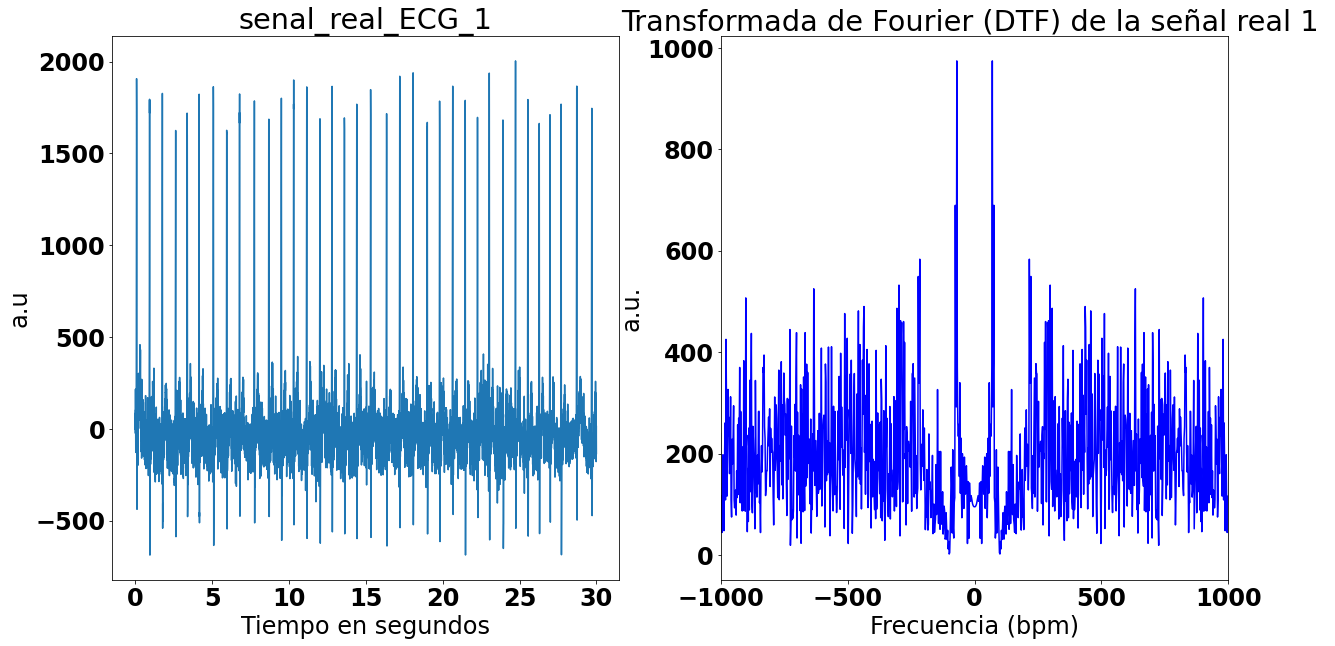

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = 20, 10 # para modificar el tamaño de la figura

font = {'weight' : 'bold',
        'size'   : 24}

plt.rc('font', **font)




#***senalr_1=np.loadtxt('senal_real_ECG_1.txt')  ---> Esto para recordar como se llaman los datos de la señal real.
#*** para las dos señales
dt= 1/(1024)
#***

real_1=senalr_1.size #Cantidad de datos de la señal real 1.
duration = (real_1)/1024  #Utilizó la ecuación nombrada al principio de este item
tiempo_senal_real_1= np.arange(0,duration,dt) #Tiempo dado para la señal 1
plt.subplot(1,2,1)
plt.plot(tiempo_senal_real_1, senalr_1)
plt.xlabel("Tiempo en segundos")
plt.ylabel("a.u")
plt.title("senal_real_ECG_1")


# Transformada de Fourier para la señal real 1
DTF_r_1=np.fft.fftshift(np.fft.fft(np.fft.fftshift(senalr_1)))*dt  #Transformada de Fourier para la señal real 1
fr_r_1 = 60*np.arange(-1/(2*dt),1/(2*dt),1/(dt*real_1))   #Frecuencia en bpm para los datos reales.


# Gráfica de la senal_1 real con su respectiva transformada de Fourier.
plt.subplot(1,2,2)
plt.plot(fr_r_1,abs(DTF_r_1),color='blue')
plt.title('Transformada de Fourier (DTF) de la señal real 1 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (bpm)')
plt.xlim(-1000,1000)   # Para mirar un intervalo en el rango de las frecuencias.

plt.figure()


Gráfica y transformada para la señal real 2:

<Figure size 1440x720 with 0 Axes>

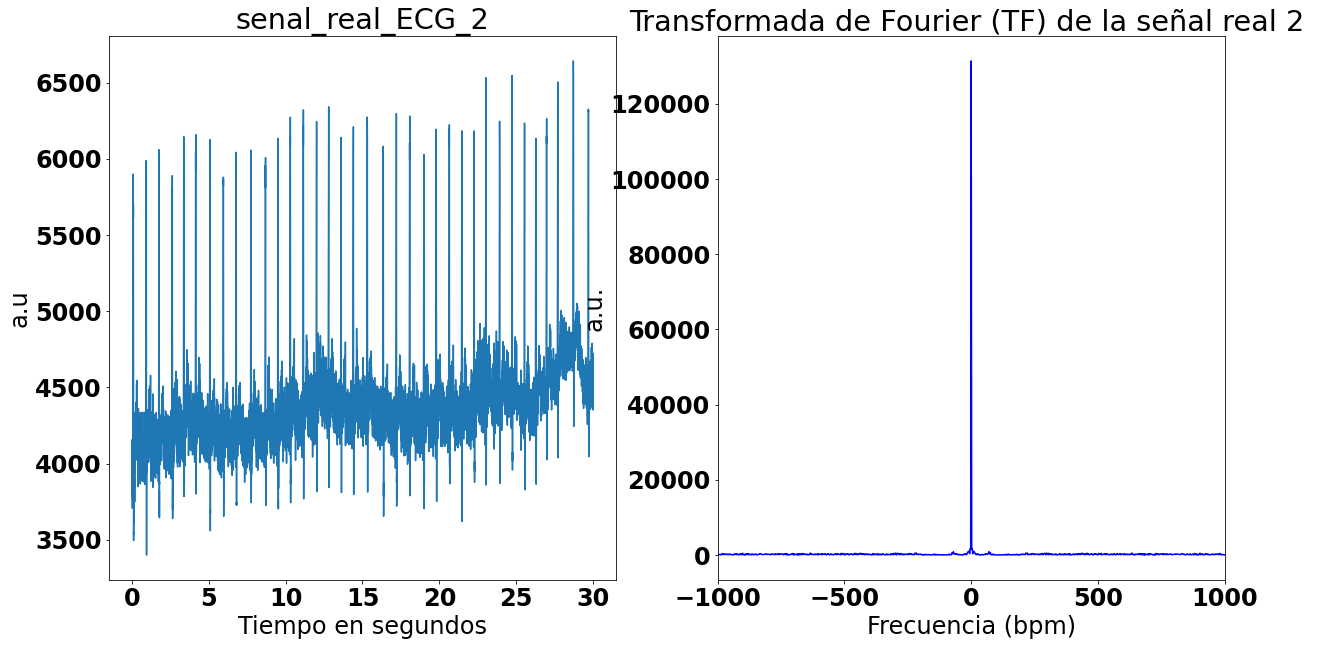

<Figure size 1440x720 with 0 Axes>

In [ ]:

plt.rcParams['figure.figsize'] = 20, 10 # para modificar el tamaño de la figura

font = {'weight' : 'bold',
        'size'   : 24}

plt.rc('font', **font)

#***senalr_2=np.loadtxt('senal_real_ECG_2.txt') ---> esto para recordar como se llaman los datos para la señal 2
#Recordemos que el dt es el mismo para las dos señales.
real_2=senalr_2.size #Cantidad de datos de la señal real 2.
duration = (real_2)/1024  #Utilizó la formula nombrado al principio del item 4
tiempo_senal_real_2= np.arange(0,duration,dt) #Tiempo dado para la señal 2


#Graficación de la senal_2 real
plt.subplot(1,2,1)
plt.plot(tiempo_senal_real_2, senalr_2)
plt.xlabel("Tiempo en segundos")
plt.ylabel("a.u")
plt.title("senal_real_ECG_2")



# Transformada de Fourier para la señal real 2
DTF_r_2=np.fft.fftshift(np.fft.fft(np.fft.fftshift(senalr_2)))*dt  #Transformada de Fourier para la señal real 2
fr_r_2 = 60*np.arange(-1/(2*dt),1/(2*dt),1/(dt*real_2))   #Frecuencia en bpm para los datos reales.


# Gráfica de la senal_2 con su respectiva transformada de Fourier.
plt.subplot(1,2,2)
plt.plot(fr_r_2,abs(DTF_r_2),color='blue')
plt.title('Transformada de Fourier (TF) de la señal real 2 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (bpm)')
plt.xlim(-1000,1000)   # Para mirar un intervalo en el rango de las frecuencias.

plt.figure()


Soluciones el problema para la transformada de la señal 2:

<Figure size 1440x720 with 0 Axes>

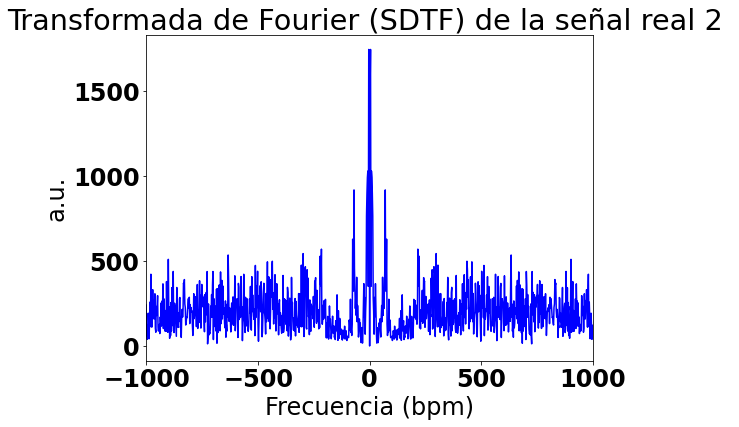

<Figure size 1440x720 with 0 Axes>

In [ ]:
mean_senalr_2 = np.mean(senalr_2)  #Promedio de los datos de la senalr_2, recuerde que este arreglo es exportado desde un documento txt.
solucionfr2 = senalr_2 - mean_senalr_2  #Utilizó la solución propuesta en la tarea.

# Transformada de Fourier para la señal real 2
SDTF_r_2=np.fft.fftshift(np.fft.fft(np.fft.fftshift(solucionfr2)))*dt  #Transformada de Fourier para la señal real 2, Se denota como SDTF_r_2 para indicar la solución de la transformada de Fourier de la señal 2
fr_r_2 = 60*np.arange(-1/(2*dt),1/(2*dt),1/(dt*real_2))   #Frecuencia en bpm para los datos reales.

# Gráfica de la senal_2 con su respectiva transformada de Fourier.
plt.figure(figsize=(8,6))
plt.plot(fr_r_2,abs(SDTF_r_2),color='blue')
plt.title('Transformada de Fourier (SDTF) de la señal real 2 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (bpm)')
plt.xlim(-1000,1000)   # Para mirar un intervalo en el rango de las frecuencias.

plt.figure()



A continuación, se identifica la frecuencia cardíaca y se determina si la señal ECG tomada en un paciente real corresponde a un paciente sano o no.

Ahora tomemos la información que realmente nos interesa, es decir la gráfica de las frecuencias en el intervalo $(0, t)$. con $t>>0$, claramente esto también lo aplicamos en la transformada


Desarrolo del punto 5 para la señal real 1

<Figure size 1440x720 with 0 Axes>

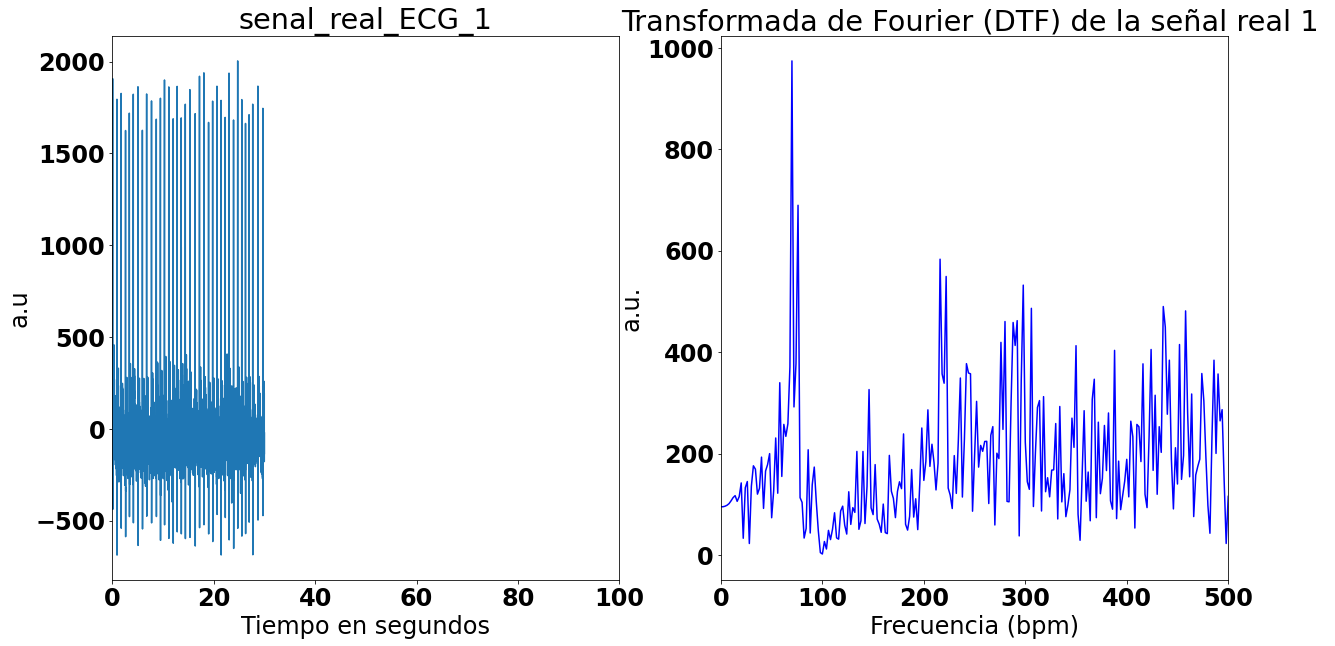

<Figure size 1440x720 with 0 Axes>

In [ ]:

plt.rcParams['figure.figsize'] = 20, 10 # para modificar el tamaño de la figura

font = {'weight' : 'bold',
        'size'   : 24}

plt.rc('font', **font)

#Señal real 1
plt.subplot(1,2,1)
plt.plot(tiempo_senal_real_1, senalr_1)
plt.xlabel("Tiempo en segundos")
plt.ylabel("a.u")
plt.xlim(0,100)
plt.title("senal_real_ECG_1")


#transformada para la señal real 1
plt.subplot(1,2,2)
plt.plot(fr_r_1,abs(DTF_r_1),color='blue')
plt.title('Transformada de Fourier (DTF) de la señal real 1 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (bpm)')
plt.xlim(0,500)   # Para mirar un intervalo en el rango de las frecuencias.

plt.figure()



Podemos ver que en la gráfica de la transformada de Fourier de la señal real 1, tengo un rango de frecuencia en unidades $bpm$. La pregunta interesante es: ¿Cuál es el armónico fundamental(Esta me da información sobre la frecuencia cardiaca)? Podemos ver que tenemos muchos picos pero el armónico fundamental se encuentra aproximadamente entre $80 bpm$ y $100 bpm$, lo demás es ruido.

Hallemos la frecuencia del paciente para la señal 1

In [ ]:
#Tomo un rango donde está el valor
print(fr_r_1[15360])
print(fr_r_1[15450])



fr__1=fr_r_1[15360: 15450]  #Elijo el intervalo.
ft__1 = DTF_r_1[15360: 15450]  #Escojo el mismo intervalo para la transformada de la señal 2
k2= np.argmax(abs(ft__1))  #Halló el pico en el intervalo que tomo
print(k2) #Este valor dado lo sumo al menor numero de la lista es decir en este caso a 17000
print("La frecuencia del paciente 1 con la señal real es:", int(fr_r_1[15395]),'bpm')




2.444721758365631e-08
180.00000002459046
35
La frecuencia del paciente 1 con la señal real es: 70 bpm


Desarollo del punto 5 para la señal real 2:

<Figure size 1440x720 with 0 Axes>

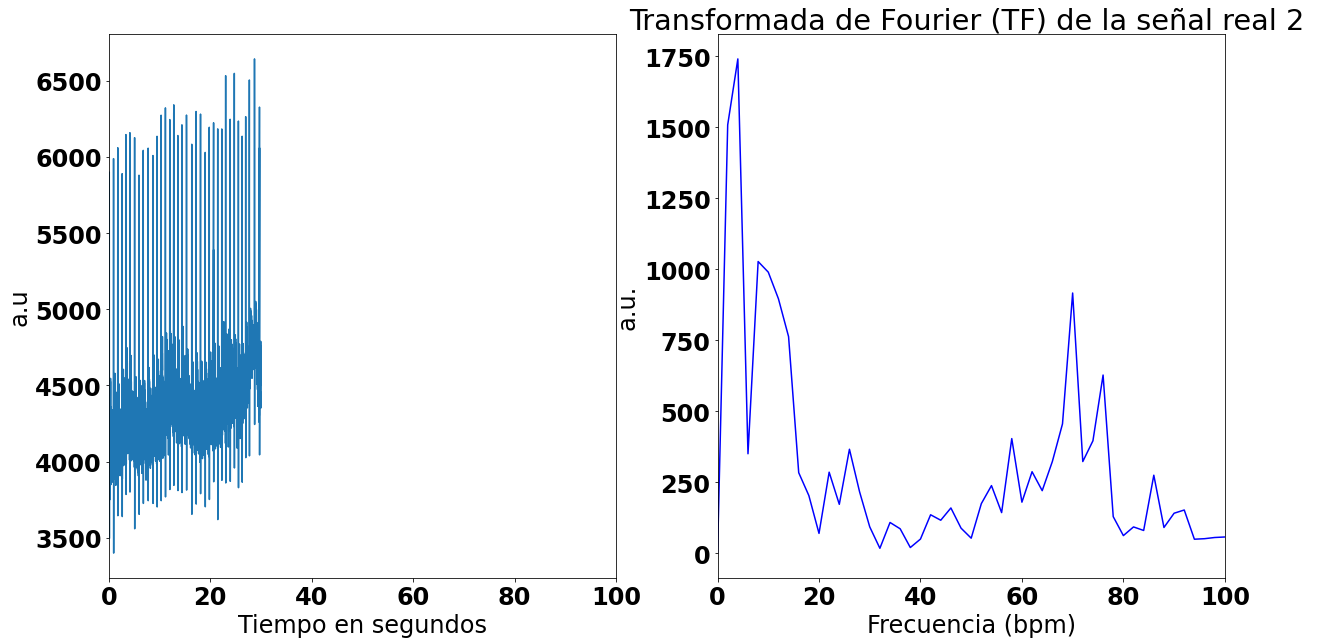

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.subplot(1,2,1)
plt.plot(tiempo_senal_real_2, senalr_2)
plt.xlabel("Tiempo en segundos")
plt.ylabel("a.u")
plt.xlim(0,100)


# Gráfica de la senal_2 con su respectiva transformada de Fourier.
plt.subplot(1,2,2)
plt.plot(fr_r_2,abs(SDTF_r_2),color='blue')
plt.title('Transformada de Fourier (TF) de la señal real 2 ')
plt.ylabel('a.u.')
plt.xlabel('Frecuencia (bpm)')
plt.xlim(0,100)   # Para mirar un intervalo en el rango de las frecuencias.

plt.figure()

In [ ]:
#Tomo un rango donde está el valor
print(fr_r_2[15380])
print(fr_r_2[15410])



fr__2=fr_r_2[15380: 15410]  #Elijo el intervalo.
ft__2 = SDTF_r_2[15380: 15410]  #Escojo el mismo intervalo para la transformada de la señal 2
k2= np.argmax(abs(ft__2))
print(k2)
print("La frecuencia del paciente 1 con la señal real es:", int(fr_r_2[15395]),'bpm')

40.00000002447905
100.0000000245268
15
La frecuencia del paciente 1 con la señal real es: 70 bpm


Por tanto la frecuencia cardiaca del paciente es $70 bpm$, si el paciente se encuentra en reposo quiere decir que el salud del paciente se encuentra en buena condición.

6. ¿Cuál es la frecuencia cardíaca? ¿De las dos señales reales, puede identificar la que tuvo un tratamiento digital previo? Justifique.

## Solución parte 6:

La frecuencia cardíaca del paciente es $70 bpm$

Si se puede identificar y la señal ECG real 2 es la que tuvo un tratamiento digital previo, desarrollado en el punto 4. Ya que el bias oscila entre 4000 y 4500, y este nos representa una frecuencia de valor $0$ por tanto lo que hacemos es desplazar esto para poder obtener los picos, ya que estos son los que nos pueden dar la información sobre la frecuencia cardíaca.